# Data Preprocessing:

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel(r'EastWestAirlines.xlsx',sheet_name='data',header=0,index_col =0) #load dataset

In [3]:
data.head() # display top 5 rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.shape  # rows, columns

(3999, 11)

In [5]:
data.isnull().sum()  # no null value in the dataset

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
data.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
data[data.duplicated()]  # print duplicated rows 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [8]:
data = data.drop_duplicates()  # remove duplicated rows 

In [9]:
data[data.duplicated()]  # there is no duplicated row now

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,


# Outliers don't have any impact in Unsupervised ML algorithm. But we can learn how to treat outliers through an example

In [10]:
import matplotlib.pyplot as plt #boxplot function is available in this lib 

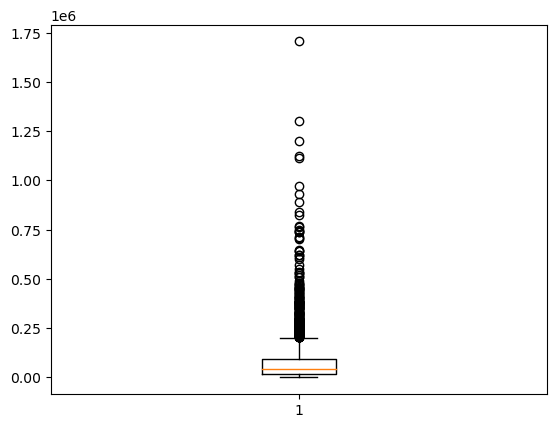

In [11]:
plt.boxplot(data['Balance']) #plot boxplot for Balance column
plt.show()

# Treat an outlier above 1.50*10^6 in column Balance

In [12]:
data.drop(data[data['Balance'] > 1.50*1000000].index,axis=0,inplace=True) # remove one outlier above 1.50*10^6

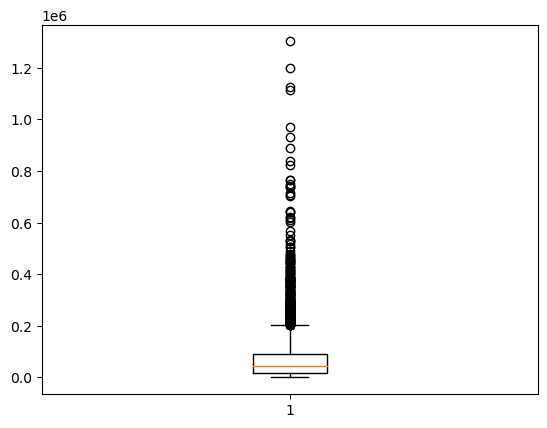

In [13]:
plt.boxplot(data['Balance']) # one outlier has been removed now
plt.show()

# plot Probability Density Function(PDF) for Balance column

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nitin\AppData\Local\Temp\ipykernel_8284\1901466345.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Balance'])


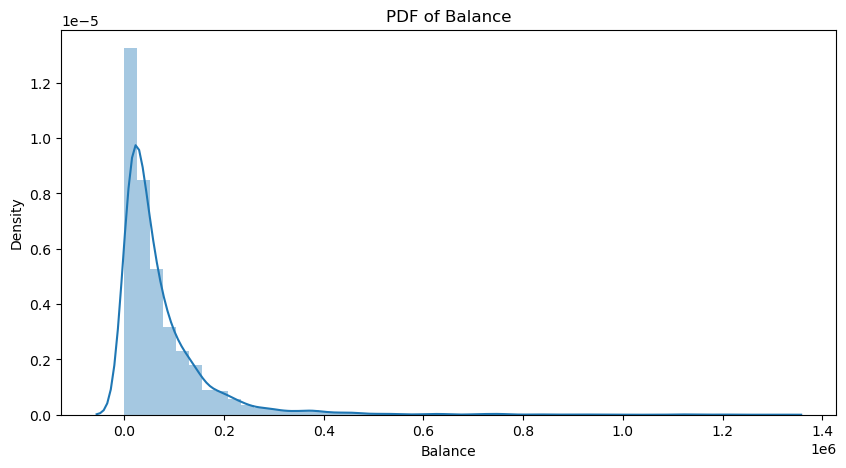

In [15]:
plt.figure(figsize =(10,5))
sns.distplot(data['Balance'])
plt.title('PDF of Balance')
plt.show()

graph is  close to normal distribution (slightly right skewed)

<AxesSubplot:xlabel='Qual_miles'>

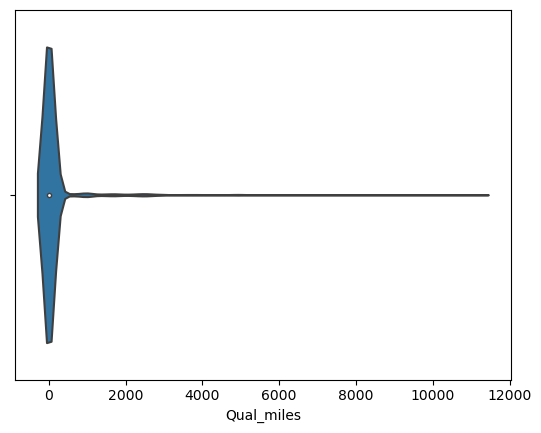

In [16]:
sns.violinplot(x=data['Qual_miles']) # distribution of data of column Qual_miles

In [17]:
from scipy import stats
data = data.apply(stats.zscore)  # data scaling

In [18]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100


# Implementing Clustering Algorithms:

# K-Means

Text(0, 0.5, 'WCSS')

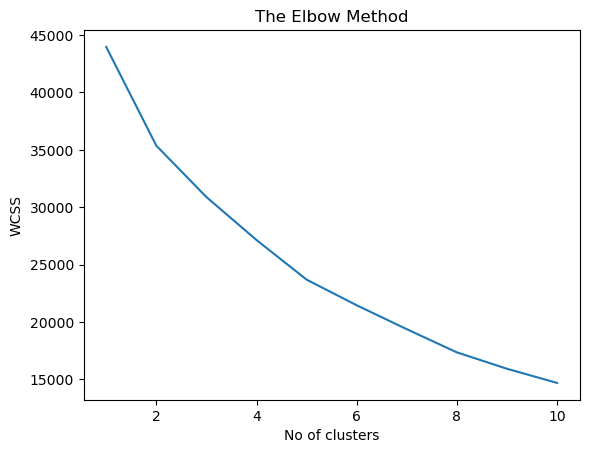

In [19]:
from sklearn.cluster import KMeans  # K means clustering algo

wcss = [] # empty list
for K in range(1,11):
    kmeans = KMeans(n_clusters=K,random_state=10)  # define algorithm
    kmeans.fit(data)  # train algorithm
    wcss.append(kmeans.inertia_)  # append distance in the empty list
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel("WCSS")

At K= 5, graph stop reducing drastically . So, K=5 is the optimal no. of clusters

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

In [20]:
#Again train the model using best value of K i.e. K =5
kmeans = KMeans(n_clusters=5,random_state=10)
Y_pred = kmeans.fit_predict(data)   # train the model & then calculate the predicted classes for given dataset

In [21]:
Y_pred

array([2, 2, 2, ..., 1, 2, 2])

In [22]:
data['clusters'] = Y_pred # add a new column 

In [23]:
data.head() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
ID#,,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813,2
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813,2
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813,2
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813,2
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,1


column clusters is y-parameter

# Visualization

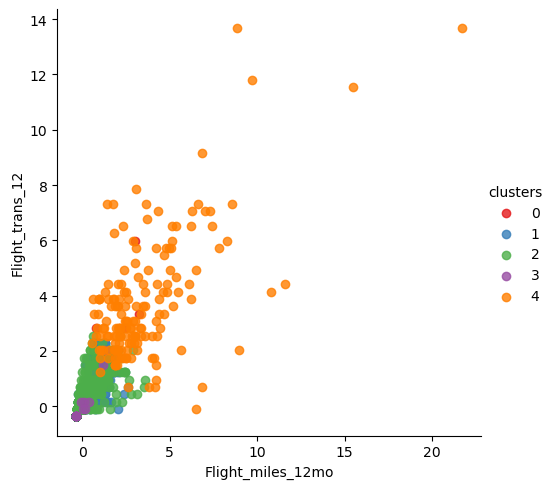

In [24]:
sns.lmplot(data=data, x= 'Flight_miles_12mo',y='Flight_trans_12', fit_reg=False,hue='clusters',palette='Set1') # lmplot() method is used to draw a scatter plot on a FacetGrid. This method use x,y parameters

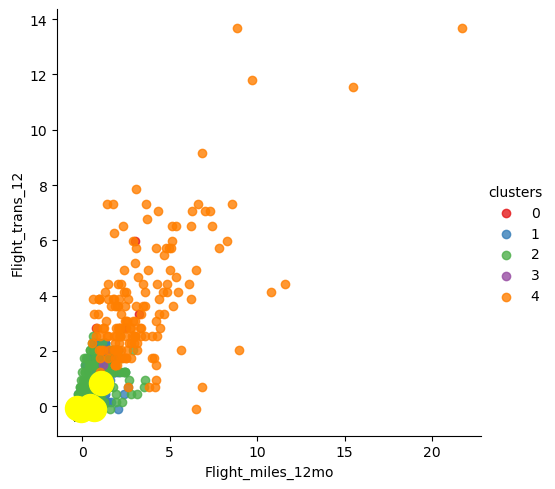

In [25]:
sns.lmplot(data=data, x= 'Flight_miles_12mo',y='Flight_trans_12', fit_reg=False,hue='clusters',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300,c='yellow') # fill centers of all clusters with yellow color

plt.show()

customers of cluster 4 (orange) have more flight miles and more flight transactions in past 12 months, so, they are the best customers (Target customers)

# Evaluation and Performance Metrics:


In [26]:
from sklearn.metrics import silhouette_score
silhouette_score(data, Y_pred)

0.3485418827788334

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster

# Cluster Analysis and Interpretation:

In [27]:
data['clusters'] = data['clusters'].map({0:'bad',1:'fair',2:'average',3:'careless',4:'Target'}) #replace old column with new colu

In [28]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
ID#,,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813,average
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813,average
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813,average
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813,average
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,fair


In [29]:
data_new =data[data['clusters'] == 'Target']

In [30]:
data_new # list of Target customers 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
ID#,,,,,,,,,,,,
22,1.154457,2.429472,-0.769885,-0.098267,-0.062782,-0.159369,0.458468,0.958716,2.019909,1.345476,1.304100,Target
43,-0.132397,-0.186347,-0.769885,-0.098267,-0.062782,-0.296001,1.500369,1.995420,2.019909,1.797423,1.304100,Target
51,0.358498,-0.186347,-0.769885,-0.098267,-0.062782,-0.446379,-0.687624,4.224690,0.961183,1.320287,-0.766813,Target
66,-0.198080,-0.186347,0.682667,-0.098267,-0.062782,0.688040,3.479982,3.639846,7.313537,1.311568,1.304100,Target
97,1.153102,-0.186347,2.135218,-0.098267,-0.062782,3.879929,2.854841,1.780929,3.872679,1.288316,1.304100,Target
...,...,...,...,...,...,...,...,...,...,...,...,...
3930,0.546884,-0.186347,-0.769885,-0.098267,-0.062782,-0.345354,0.354278,3.377453,2.813953,-1.236387,-0.766813,Target
3934,-0.177469,2.751280,-0.769885,-0.098267,-0.062782,-0.374502,0.771038,2.606002,3.872679,-1.243169,-0.766813,Target
3940,0.590591,-0.186347,1.408942,-0.098267,-0.062782,2.002315,2.646461,4.211106,1.490546,-1.246559,-0.766813,Target


# hierarchical

In [31]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
ID#,,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813,average
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813,average
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813,average
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813,average
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,fair


In [32]:
data = data.drop(['clusters'],axis=1)

In [33]:
data.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100


In [34]:
import scipy.cluster.hierarchy as shc  # import readymade Hierarchical clustering algo 

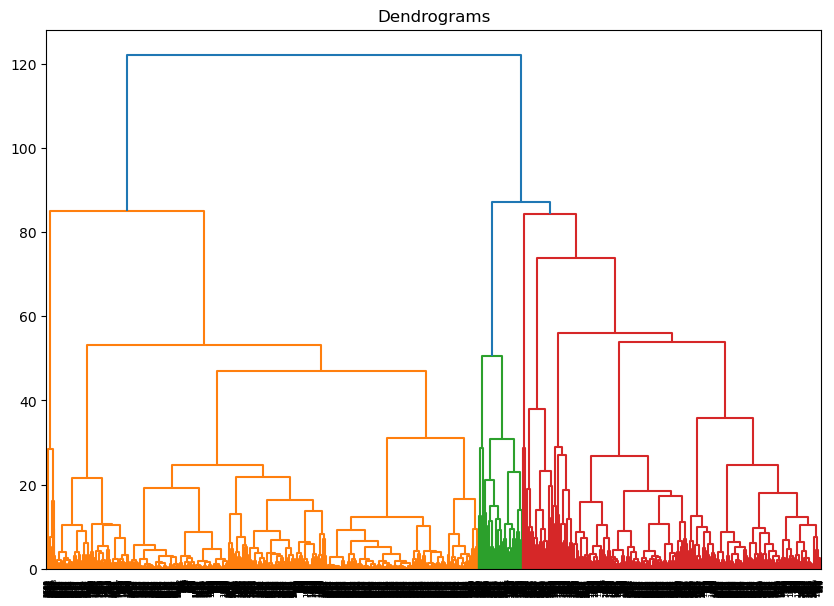

In [35]:
plt.figure(figsize = (10,7))
dend = shc.dendrogram(shc.linkage(data,method='ward'))    # create dendrogram
plt.title('Dendrograms')
plt.show()

The linkage method used in hierarchical clustering determines how the distance between clusters is calculated. There are several linkage methods used in hierarchical clustering, including single linkage, complete linkage, average linkage, and ward linkage

Ward's procedure is a variance method which attempts to generate clusters to minimise the within-cluster variance.

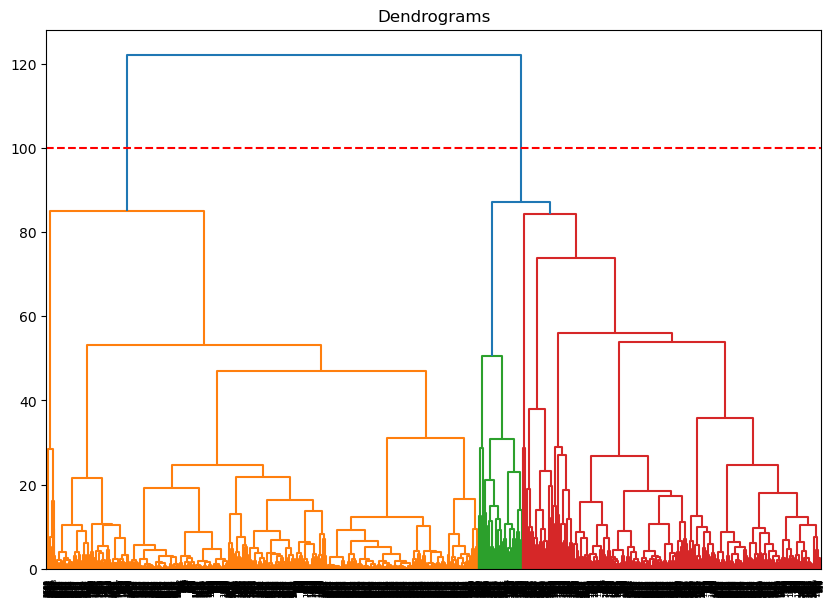

In [36]:
plt.figure(figsize = (10,7))
dend = shc.dendrogram(shc.linkage(data,method='ward'))
plt.title('Dendrograms')
plt.axhline(y=100, color ='r',linestyle= "--")  # draw a red line which passes through y= 100

plt.show()

optimal no. of clusters = 2 (by cutting the most heighted dendrogram)

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage= 'ward')

In [38]:
cluster

AgglomerativeClustering()

In [39]:
Y_pred = cluster.fit_predict(data)  # train the model & calculate the predicted classes for given dataset

In [40]:
Y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [41]:
data['Clusters'] = Y_pred # add a new column

In [42]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813,1
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813,1
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813,1
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813,1
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,0


In [43]:
data['Clusters'].value_counts()

1    2229
0    1768
Name: Clusters, dtype: int64

In [44]:
data[data['Clusters']==0]


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,0
7,0.120123,-0.186347,0.682667,-0.098267,-0.062782,0.427818,1.396179,-0.328227,-0.362223,1.392947,-0.766813,0
10,0.324861,-0.186347,0.682667,-0.098267,-0.062782,0.466903,1.708750,0.493986,0.431821,1.362430,1.304100,0
12,0.239274,-0.186347,2.135218,-0.098267,-0.062782,1.819932,0.771038,-0.328227,-0.362223,1.359039,1.304100,0
16,-0.458996,-0.186347,1.408942,-0.098267,-0.062782,1.337042,0.354278,-0.328227,-0.362223,1.353226,1.304100,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4002,-0.158264,-0.186347,0.682667,-0.098267,-0.062782,0.157742,0.354278,0.528305,0.431821,-1.305172,1.304100,0
4003,-0.455178,-0.186347,0.682667,-0.098267,-0.062782,0.083629,1.708750,-0.328227,-0.362223,-1.304688,-0.766813,0
4008,-0.145700,-0.186347,1.408942,-0.098267,-0.062782,0.728574,1.396179,-0.328227,-0.362223,-1.308078,-0.766813,0


In [45]:
cluster_0= data[data['Clusters']==0]

In [46]:
cluster_0

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,0
7,0.120123,-0.186347,0.682667,-0.098267,-0.062782,0.427818,1.396179,-0.328227,-0.362223,1.392947,-0.766813,0
10,0.324861,-0.186347,0.682667,-0.098267,-0.062782,0.466903,1.708750,0.493986,0.431821,1.362430,1.304100,0
12,0.239274,-0.186347,2.135218,-0.098267,-0.062782,1.819932,0.771038,-0.328227,-0.362223,1.359039,1.304100,0
16,-0.458996,-0.186347,1.408942,-0.098267,-0.062782,1.337042,0.354278,-0.328227,-0.362223,1.353226,1.304100,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4002,-0.158264,-0.186347,0.682667,-0.098267,-0.062782,0.157742,0.354278,0.528305,0.431821,-1.305172,1.304100,0
4003,-0.455178,-0.186347,0.682667,-0.098267,-0.062782,0.083629,1.708750,-0.328227,-0.362223,-1.304688,-0.766813,0
4008,-0.145700,-0.186347,1.408942,-0.098267,-0.062782,0.728574,1.396179,-0.328227,-0.362223,-1.308078,-0.766813,0


In [47]:
cluster_0.shape

(1768, 12)

In [48]:
cluster_0.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,0
7,0.120123,-0.186347,0.682667,-0.098267,-0.062782,0.427818,1.396179,-0.328227,-0.362223,1.392947,-0.766813,0
10,0.324861,-0.186347,0.682667,-0.098267,-0.062782,0.466903,1.708750,0.493986,0.431821,1.362430,1.304100,0
12,0.239274,-0.186347,2.135218,-0.098267,-0.062782,1.819932,0.771038,-0.328227,-0.362223,1.359039,1.304100,0
16,-0.458996,-0.186347,1.408942,-0.098267,-0.062782,1.337042,0.354278,-0.328227,-0.362223,1.353226,1.304100,0


In [49]:
cluster_1= data[data['Clusters']==1]

In [50]:
cluster_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813,1
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813,1
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813,1
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813,1
6,-0.582941,-0.186347,-0.769885,-0.098267,-0.062782,-0.710037,-1.208574,-0.328227,-0.362223,1.367758,-0.766813,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4016,-0.710695,-0.186347,-0.769885,-0.098267,-0.062782,-0.694925,-0.896004,-0.328227,-0.362223,-1.318251,-0.766813,1
4017,-0.561837,-0.186347,-0.769885,-0.098267,-0.062782,-0.357071,-0.791814,-0.185233,-0.097542,-1.315345,1.304100,1
4018,-0.090599,-0.186347,-0.769885,-0.098267,-0.062782,-0.669420,-0.687624,-0.328227,-0.362223,-1.319220,1.304100,1


In [51]:
cluster_1.shape

(2229, 12)

In [52]:
cluster_1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813,1
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813,1
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813,1
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813,1
6,-0.582941,-0.186347,-0.769885,-0.098267,-0.062782,-0.710037,-1.208574,-0.328227,-0.362223,1.367758,-0.766813,1


# Visualization:

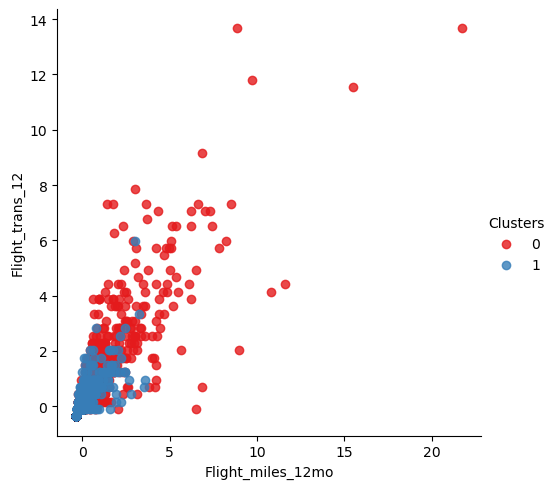

In [53]:
sns.lmplot(data=data, x= 'Flight_miles_12mo',y='Flight_trans_12', fit_reg=False,hue='Clusters',palette='Set1')

plt.show()

customers of cluster 0 have more flight miles and more flight transactions in past 12  months. So, they are my best customers (Target customers)

# Evaluation and Performance Metrics

In [54]:
from sklearn.metrics import silhouette_score
silhouette_score(data, Y_pred)

0.27931274898222597

 Values near 0 indicate overlapping clusters.

# Cluster Analysis and Interpretation:


In [55]:
data['Clusters'] = data['Clusters'].map({0:'Target',1:'average'})

In [56]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813,average
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813,average
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813,average
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813,average
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,Target


In [57]:
data[data['Clusters'] == 'Target']

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,Target
7,0.120123,-0.186347,0.682667,-0.098267,-0.062782,0.427818,1.396179,-0.328227,-0.362223,1.392947,-0.766813,Target
10,0.324861,-0.186347,0.682667,-0.098267,-0.062782,0.466903,1.708750,0.493986,0.431821,1.362430,1.304100,Target
12,0.239274,-0.186347,2.135218,-0.098267,-0.062782,1.819932,0.771038,-0.328227,-0.362223,1.359039,1.304100,Target
16,-0.458996,-0.186347,1.408942,-0.098267,-0.062782,1.337042,0.354278,-0.328227,-0.362223,1.353226,1.304100,Target
...,...,...,...,...,...,...,...,...,...,...,...,...
4002,-0.158264,-0.186347,0.682667,-0.098267,-0.062782,0.157742,0.354278,0.528305,0.431821,-1.305172,1.304100,Target
4003,-0.455178,-0.186347,0.682667,-0.098267,-0.062782,0.083629,1.708750,-0.328227,-0.362223,-1.304688,-0.766813,Target
4008,-0.145700,-0.186347,1.408942,-0.098267,-0.062782,0.728574,1.396179,-0.328227,-0.362223,-1.308078,-0.766813,Target


In [58]:
data_new = data[data['Clusters'] == 'Target']

In [59]:
data_new.head()  # list of Target customers

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,Target
7,0.120123,-0.186347,0.682667,-0.098267,-0.062782,0.427818,1.396179,-0.328227,-0.362223,1.392947,-0.766813,Target
10,0.324861,-0.186347,0.682667,-0.098267,-0.062782,0.466903,1.708750,0.493986,0.431821,1.362430,1.304100,Target
12,0.239274,-0.186347,2.135218,-0.098267,-0.062782,1.819932,0.771038,-0.328227,-0.362223,1.359039,1.304100,Target
16,-0.458996,-0.186347,1.408942,-0.098267,-0.062782,1.337042,0.354278,-0.328227,-0.362223,1.353226,1.304100,Target


# DBSCAN

In [60]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)  # define the algorithm

In [61]:
db   # eps is the maximum distance between two data points and there are atleast 10 data points in each cluster

DBSCAN(eps=0.3, min_samples=10)

In [62]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813,average
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813,average
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813,average
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813,average
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,Target


In [63]:
data = data.drop(['Clusters'],axis=1)

In [64]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100


In [65]:
Y_pred = db.fit_predict(data)  # train the model & then calculate the predicted classes for the given data

In [66]:
Y_pred

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [67]:
# the number of clusters found by DBSCAN
n_clusters = len(set(Y_pred)) - (1 if -1 in Y_pred else 0)

In [68]:
n_clusters

6

In [69]:
data['Clusters'] = Y_pred

In [70]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
ID#,,,,,,,,,,,,
1,-0.462609,-0.186347,-0.769885,-0.098267,-0.062782,-0.702833,-1.104384,-0.328227,-0.362223,1.395854,-0.766813,0
2,-0.553954,-0.186347,-0.769885,-0.098267,-0.062782,-0.701135,-1.000194,-0.328227,-0.362223,1.380353,-0.766813,0
3,-0.327003,-0.186347,-0.769885,-0.098267,-0.062782,-0.539330,-0.791814,-0.328227,-0.362223,1.412323,-0.766813,0
4,-0.599816,-0.186347,-0.769885,-0.098267,-0.062782,-0.689335,-1.104384,-0.328227,-0.362223,1.372602,-0.766813,0
5,0.251900,-0.186347,1.408942,-0.098267,-0.062782,1.082741,1.500369,1.156762,0.696502,1.364367,1.304100,-1


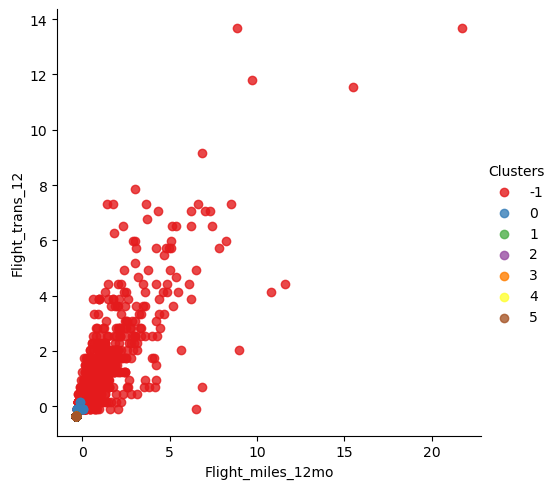

In [71]:
sns.lmplot(data=data, x= 'Flight_miles_12mo',y='Flight_trans_12', fit_reg=False,hue='Clusters',palette='Set1')
plt.show()

In [72]:
from sklearn.metrics import silhouette_score   # evaluate the model
silhouette_score(data, Y_pred)

0.020933500606050617

score close to 0 means overlapping clusters